# Aula 23/04/2025: Manipulação de Dados com Pandas

## 1. Importação de Bibliotecas

In [7]:

import pandas as pd
import matplotlib.pyplot as plt

# Configurar opções do pandas para melhor visualização
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)


## 2. Introdução aos DataFrames

In [ ]:

# Criando um DataFrame de exemplo
dados = {'Nome': ['João', 'Carlos', 'Pedro', 'Ana'],
         'Idade': [30, 32, 33, 28],
         'Estado': ['SP', 'RJ', 'MG', 'SP'],
         'Nota_Consumidor': [4, 3, 5, 2]}

df = pd.DataFrame(dados)
df.head()


## 3. Agrupamento de Dados com `groupby()`

In [ ]:
df.groupby('Estado')['Nota_Consumidor'].mean()

## 4. Análise de Frequência com `crosstab()`
Cria uma tabela cruzada (crosstab), que mostra a contagem de ocorrências de cada combinação entre Estado e Nota_Consumidor.

In [ ]:
pd.crosstab(df['Estado'],df['Nota_Consumidor'])

## 5. Contagem de Ocorrências com `value_counts()`

In [ ]:
df['Estado'].value_counts()

## 6. Estatísticas Descritivas com `describe()`

In [ ]:
df.describe()

## 7. Tabela Dinâmica com `pivot_table()`
Cria uma tabela dinâmica (pivot table), calculando a média e a contagem de avaliações por Estado.


In [ ]:
df.pivot_table(values="Nota_Consumidor",index="Estado", aggfunc=['mean','count','max'])

##8. DATAFRAME A PARTIR DO CSV CONSOLIDADO DA BASE CONSUMIDORES

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# criando o df a partir do csv
df = pd.read_csv("/content/drive/MyDrive/PI/dados_consolidados2.csv", sep=',', encoding="utf-8")

In [ ]:
df.head(3)

In [ ]:
df.describe()

#Aula 03/04/2025

## 9. Exercícios Práticos


Agora, você deve responder às seguintes perguntas utilizando os dados disponíveis.

### **Perguntas:**
1. Qual a relação entre **nota do consumidor** e **segmento de mercado**?
2. Existe alguma correlação entre **tempo de resposta** e **satisfação do consumidor**?
3. Quais estados possuem mais reclamações?
4. Quais são os **10 setores mais reclamados**?
5. Há diferença na quantidade de reclamações entre **homens e mulheres**?

Preencha as células abaixo com suas análises.


In [ ]:

# Resposta 1: Nota do consumidor por segmento de mercado
media_segmento = df.groupby('Segmento de Mercado')['Nota do Consumidor'].mean()
print(media_segmento)
media_segmento.sort_values(ascending=False)

top_segmentos = media_segmento.head(15)
# Cria o gráfico de barras
plt.figure(figsize=(10, 6))  # Define o tamanho do gráfico
#media_segmento.plot(kind='bar', color='skyblue')
top_segmentos.plot(kind='bar', color='skyblue')

# Adiciona títulos e rótulos
plt.title('Média das Notas por Segmento de Mercado')
plt.xlabel('Segmento de Mercado')
plt.ylabel('Média das Notas')
plt.xticks(rotation=60)  # Rotaciona os nomes para melhor leitura
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)



In [ ]:

# Resposta 2: Correlação entre tempo de resposta e satisfação do consumidor
df[['Tempo Resposta', 'Nota do Consumidor']].corr()


In [ ]:

# Resposta 3: Estados com mais reclamações
df['UF'].value_counts().head(10)


In [ ]:

# Resposta 4: 10 setores mais reclamados
df['Segmento de Mercado'].value_counts().head(10)


In [ ]:

# Resposta 5: Diferença de reclamações entre homens e mulheres
df['Sexo'].value_counts()


## 10. Exercícios Práticos

Agora, você deve responder às seguintes perguntas utilizando os dados disponíveis.

### **Perguntas:**
### **Relacionadas a Nota do Consumidor:**

##6. Quais os segmentos de mercado com maior e menor variabilidade na nota do consumidor?

O cálculo da variabilidade na nota do consumidor, usando o desvio padrão, é importante por diversos motivos:

1. Identificar Segmentos Instáveis:
Alta variabilidade indica que as notas dos consumidores para um determinado segmento de mercado são muito dispersas, com opiniões divergentes. Isso pode apontar para problemas de consistência na qualidade dos produtos/serviços oferecidos nesse segmento, ou expectativas variadas por parte dos clientes.

2. Avaliar Riscos e Oportunidades:
Segmentos com alta variabilidade podem representar maior risco para as empresas, já que é mais difícil prever a reação dos consumidores.
Por outro lado, essa variabilidade pode indicar oportunidades de melhoria, direcionando esforços para atender às expectativas dos clientes e reduzir a dispersão das notas.

3. Segmentar e Personalizar Estratégias:
Ao entender a variabilidade das notas em cada segmento, as empresas podem segmentar melhor seus clientes e desenvolver estratégias de marketing e comunicação mais personalizadas.
Por exemplo, um segmento com alta variabilidade pode se beneficiar de campanhas que enfatizem diferentes aspectos do produto/serviço para diferentes grupos de clientes.

4. Monitorar a Eficácia de Ações:
Acompanhando a variabilidade das notas ao longo do tempo, é possível monitorar a eficácia de ações como campanhas de marketing, lançamentos de produtos e mudanças no atendimento ao cliente.
Uma redução na variabilidade pode indicar que as ações estão tendo o efeito desejado de homogeneizar a percepção dos clientes sobre a marca.

5. Benchmarking e Melhoria Contínua:
Comparar a variabilidade das notas com a de concorrentes ou com a média do mercado permite identificar áreas de aprimoramento.
Buscar entender as causas da variabilidade e implementar medidas para reduzi-la contribui para a melhoria contínua da qualidade dos produtos/serviços e da satisfação do cliente.
Em resumo, entender a variabilidade na nota do consumidor é fundamental para tomar decisões estratégicas mais assertivas, gerenciar riscos, identificar oportunidades e promover a satisfação e fidelização dos clientes.

In [ ]:
# Calcular o desvio padrão das avaliações do consumidor para cada segmento
variabilidade_segmento = df.groupby('Segmento de Mercado')['Nota do Consumidor'].std() #desvio padrão

# Classifique os segmentos por variabilidade em ordem decrescente para encontrar a maior variabilidade
maior_variabilidade = variabilidade_segmento.sort_values(ascending=False).head(10)

# Classifique os segmentos por variabilidade em ordem crescente para encontrar a menor variabilidade
menor_variabilidade = variabilidade_segmento.sort_values(ascending=True).head(10)

print("Segmentos com maior variabilidade:")
print(maior_variabilidade)
print("\nSegmentos com menor variabilidade:")
print(menor_variabilidade)

##7. Existe alguma sazonalidade na nota do consumidor ao longo do ano?

In [ ]:
# Converter a coluna 'Data' para datetime se ainda não estiver
df['Data Finalização'] = pd.to_datetime(df['Data Finalização'])

# Extrair o mês da coluna 'Data'
df['Mes'] = df['Data Finalização'].dt.month

# Calcular a média da nota do consumidor por mês
media_nota_mes = df.groupby('Mes')['Nota do Consumidor'].mean()

# Plotar um gráfico de linha para visualizar a sazonalidade
plt.figure(figsize=(10, 6))
plt.plot(media_nota_mes.index, media_nota_mes.values, marker='o')
plt.title('Média da Nota do Consumidor por Mês')
plt.xlabel('Mês')
plt.ylabel('Média da Nota')
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.grid(True)
plt.show()

In [ ]:
df.head()

##8. A nota do consumidor está relacionada ao tipo de problema relatado?

In [ ]:
# Agrupa os dados por 'Assunto'/'Grupo Problema' e calcula a média da 'Nota do Consumidor'
media_nota_assunto = df.groupby('Grupo Problema')['Nota do Consumidor'].mean()

# Ordena os assuntos pela média da nota do consumidor em ordem decrescente
media_nota_assunto = media_nota_assunto.sort_values(ascending=False)

# Plota um gráfico de barras para visualizar a relação
plt.figure(figsize=(12, 6))  # Ajusta o tamanho do gráfico para melhor visualização
media_nota_assunto.plot(kind='bar', color='skyblue')
plt.title('Média da Nota do Consumidor por Assunto')
plt.xlabel('Assunto')
plt.ylabel('Média da Nota do Consumidor')
plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de elementos
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adiciona uma grade ao gráfico
plt.show()

##9. Há diferença na nota do consumidor entre diferentes faixas etárias ou níveis de renda?

In [ ]:
# Supondo que sua coluna se chama 'Faixa_Etaria'
df['Faixa Etária'] = df['Faixa Etária'].str.strip()

# Extrai os dois números do intervalo com expressão regular
df[['idade_min', 'idade_max']] = df['Faixa Etária'].str.extract(r'entre (\d+) a (\d+)').astype('Int64')

# Cria uma nova coluna com a média do intervalo
df['Idade_Faixa'] = df[['idade_min', 'idade_max']].mean(axis=1)

# Agora você pode agrupar por essa idade média
media_nota_por_idade = df.groupby('Idade_Faixa')['Nota do Consumidor'].mean()





# Define age groups (adjust bins as needed)
bins = [18, 25, 35, 45, 55, 65, float('inf')]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['Faixa Etaria'] = pd.cut(df['Idade_Faixa'], bins=bins, labels=labels, right=False)

# Calculate average rating for each age group
media_nota_idade = df.groupby('Faixa Etaria')['Nota do Consumidor'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
media_nota_idade.plot(kind='bar', color='skyblue')
plt.title('Média da Nota do Consumidor por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Média da Nota do Consumidor')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
df.head()

### **Relacionadas a Tempo de Resposta:**

##10. O tempo de resposta varia significativamente entre diferentes empresas ou setores?

In [ ]:
import seaborn as sns  # Importar seaborn

# 1. Agrupar por 'Empresa' e calcular estatísticas de tempo de resposta
response_time_by_empresa = df.groupby('Segmento de Mercado')['Tempo Resposta'].agg(['mean', 'median', 'std'])

# 2. Visualização utilizando boxplot
plt.figure(figsize=(15, 15))
sns.boxplot(x='Segmento de Mercado', y='Tempo Resposta', data=df)  # Melhorando a estética com o seaborn
plt.title('Distribuição do Tempo de Resposta por Segmento de Mercado')
plt.xlabel('Segmento de Mercado')
plt.ylabel('Tempo de Resposta')
plt.xticks(rotation=90)  # rotação do label para melhorar visualização
plt.tight_layout()
plt.show()



# Repita os passos 1 a 3 para 'Setor' se desejar analisar por setor

##11. Qual o impacto do tempo de resposta na probabilidade de o consumidor recomendar a empresa?

Podemos investigar essa relação por meio de:

Nova Coluna Recomendação: Coluna no DataFrame que represente se um consumidor recomendaria a empresa (por exemplo, uma coluna binária com valores como 1 para "recomenda" e 0 para "não recomenda").

Análise de Correlação: Calcule a correlação entre o tempo de resposta e a variável de recomendação. Uma correlação positiva sugere que tempos de resposta mais curtos estão associados a uma maior probabilidade de recomendação.

Regressão Logística: Se tivermos uma variável de recomendação binária, podemos construir um modelo de regressão logística para prever a probabilidade de
recomendação com base no tempo de resposta. Este modelo pode quantificar o impacto do tempo de resposta na probabilidade de recomendação.

Visualização: gráficos de dispersão ou de linhas para visualizar a relação entre o tempo de resposta e a probabilidade de recomendação.

NÃO TEMOS ESSA COLUNA AINDA, MAS PODEMOS CONTRUÍ-LA!



In [ ]:
# 1. Análise de Correlação
#correlation = df[['Tempo Resposta', 'Recomendacao']].corr()
#print("Correlação entre tempo de resposta e recomendação:", correlation.iloc[0, 1])


##12. O tempo de resposta varia de acordo com a complexidade do problema relatado?

##**Relação entre Variáveis Demográficas e Comportamento do Consumidor**:

##13. Região/Cidade e Satisfação: A nota do consumidor varia significativamente entre diferentes regiões ou cidades? Existem cidades ou regiões com maior ou menor índice de satisfação?

In [ ]:
pd.set_option('display.max_rows', 200)  # ou qualquer número maior

In [ ]:
# Passo 1 - Agrupa os dados por 'UF' (estado) e 'Cidade' e calcula a média da 'Nota do Consumidor'
media_nota_regiao = df.groupby(['UF','Cidade'])['Nota do Consumidor'].mean().reset_index()

In [ ]:
# Passo 2 - Ordena as cidades/regiões pela média da nota do consumidor em ordem decrescente
media_nota_regiao = media_nota_regiao.sort_values(by=['Nota do Consumidor'], ascending=False)
media_nota_regiao.head(10)

In [ ]:
# Passo 3 - Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Cria um gráfico de barras para visualizar as médias das notas por região/cidade
plt.figure(figsize=(12, 6))
sns.barplot(x='Cidade', y='Nota do Consumidor', data=media_nota_regiao.head(100)) # top 10
plt.title('Média da Nota do Consumidor por Cidade (Top 10)')
plt.xlabel('Cidade')
plt.ylabel('Média da Nota do Consumidor')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.show()

# Repita o processo para as cidades com as menores notas (usando tail(10) em vez de head(10))

##14.Sexo e Tipo de Problema: Existe alguma relação entre o sexo do consumidor e o tipo de problema relatado? Quais problemas são mais comuns entre homens e mulheres?

In [ ]:
# Passo 1 - Cria uma tabela cruzada (crosstab) entre 'Sexo' e 'Grupo Problema'
tabela_freq = pd.crosstab(df['Sexo'], df['Grupo Problema'])

In [ ]:
# Passo 2 - Calcula a porcentagem de cada problema por sexo
tabela_porcentagem = tabela_freq.div(tabela_freq.sum(axis=1), axis=0) * 100

In [ ]:
# Passo 3  - Cria um gráfico de barras empilhadas para visualizar as porcentagens
tabela_porcentagem.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Relação entre Sexo e Tipo de Problema')
plt.xlabel('Sexo')
plt.ylabel('Porcentagem de Reclamações')
plt.xticks(rotation=0)
plt.legend(title='Grupo Problema', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##15.Faixa Etária e Canal de Compra: Há diferença no canal de compra (Como Comprou Contratou) entre diferentes faixas etárias? Consumidores mais jovens preferem comprar online, enquanto os mais velhos preferem lojas físicas?

In [ ]:
#não temos dados sobre canal de compras.

##16. A forma como o consumidor procurou a empresa (Procurou Empresa) influencia na resolução da reclamação (Situação)? Reclamações feitas por telefone são resolvidas mais rapidamente do que as feitas online?

In [ ]:
# não temos dados sobre canal de reclamação físico ou online

#Análise de Reclamações e Respostas:

##18. Tempo de Resposta e Área: O tempo de resposta varia entre diferentes áreas da empresa (Área)? Quais áreas são mais eficientes na resposta aos consumidores?

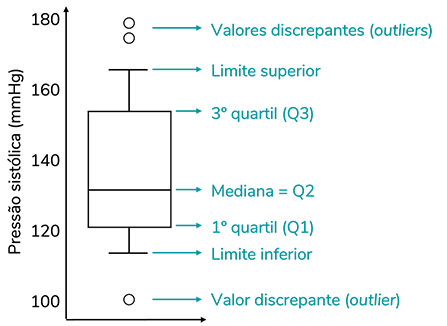

In [ ]:
#Passo 1
# Agrupa os dados por 'Área' e calcula a média, mediana e desvio padrão do 'Tempo Resposta'
tempo_resposta_por_area = df.groupby('Área')['Tempo Resposta'].agg(['mean', 'median', 'std'])

# Ordena as áreas pela média do tempo de resposta (opcional)
tempo_resposta_por_area = tempo_resposta_por_area.sort_values(by=['mean'])

In [ ]:
# Passo 2: Visualizar a distribuição do tempo de resposta por área
import seaborn as sns
import matplotlib.pyplot as plt

# Cria um boxplot para visualizar a distribuição do tempo de resposta por área
plt.figure(figsize=(10, 10))  # Define o tamanho da figura
sns.boxplot(x='Área', y='Tempo Resposta', data=df)
plt.title('Distribuição do Tempo de Resposta por Área')
plt.xlabel('Área')
plt.ylabel('Tempo de Resposta')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de elementos
plt.show()

##19.Assunto e Nota do Consumidor: Quais assuntos (Assunto) estão mais relacionados a notas baixas do consumidor? Quais assuntos geram maior insatisfação?

In [ ]:
#Passo 1:

# Agrupa os dados por 'Assunto' e calcula a média da 'Nota do Consumidor'
media_nota_assunto = df.groupby('Assunto')['Nota do Consumidor'].mean()

# Ordena os assuntos pela média da nota do consumidor em ordem crescente (para identificar os piores)
media_nota_assunto = media_nota_assunto.sort_values()

In [ ]:
#Passo 2 - Visualização de resultados
import matplotlib.pyplot as plt

# Cria um gráfico de barras para visualizar a média da nota por assunto
plt.figure(figsize=(12, 8))  # Define o tamanho da figura
media_nota_assunto.head(10).plot(kind='bar', color='skyblue')  # Plota os 10 piores assuntos
plt.title('Média da Nota do Consumidor por Assunto (15 piores)')
plt.xlabel('Assunto')
plt.ylabel('Média da Nota do Consumidor')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de elementos
plt.show()

##20.Grupo Problema e Tempo de Resposta: Existe alguma relação entre o grupo de problema (Grupo Problema) e o tempo de resposta? Problemas mais complexos levam mais tempo para serem resolvidos?

In [ ]:
#Passo 1: Agrupar por grupo de problema e calcular estatísticas de tempo de resposta
# Agrupa os dados por 'Grupo Problema' e calcula a média, mediana e desvio padrão do 'Tempo Resposta'
tempo_resposta_por_grupo = df.groupby('Grupo Problema')['Tempo Resposta'].agg(['mean', 'median', 'std'])

# Ordena os grupos de problema pela média do tempo de resposta
tempo_resposta_por_grupo = tempo_resposta_por_grupo.sort_values(by=['mean'], ascending=False)

In [ ]:
#Passo 2: Visualizar a distribuição do tempo de resposta por grupo de problema
import seaborn as sns
import matplotlib.pyplot as plt

# Cria um boxplot para visualizar a distribuição do tempo de resposta por grupo de problema
plt.figure(figsize=(12, 6))  # Define o tamanho da figura
sns.boxplot(x='Grupo Problema', y='Tempo Resposta', data=df)
plt.title('Distribuição do Tempo de Resposta por Grupo de Problema')
plt.xlabel('Grupo de Problema')
plt.ylabel('Tempo de Resposta')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de elementos
plt.show()

##21.Avaliação da Reclamação e Segmento de Mercado: A avaliação da reclamação (Avaliação Reclamação) varia entre os diferentes segmentos de mercado (Segmento de Mercado)? Quais segmentos estão mais satisfeitos com a resolução das suas reclamações?

In [ ]:
#Passo 1 tratar valores categóricos:

# Obtém os valores únicos da coluna 'Avaliação Reclamação'
valores_unicos = df['Avaliação Reclamação'].unique()
# Imprime os valores únicos
print(valores_unicos)

In [ ]:
# Passo 2 - Converter para tipo categórico e depois para numérico
df['Avaliação Reclamação cat'] = pd.Categorical(df['Avaliação Reclamação'], categories=['nan','Não Avaliada','Não Resolvida','Resolvida'], ordered=True)
df['Avaliação Reclamação num'] = df['Avaliação Reclamação cat'].cat.codes  # Converte para códigos numéricos


In [ ]:
#Passo 3: Agrupar por segmento de mercado e calcular estatísticas da avaliação da reclamação

# Agrupa os dados por 'Segmento de Mercado' e calcula a média, mediana e desvio padrão da 'Avaliação Reclamação'
avaliacao_por_segmento = df.groupby('Segmento de Mercado')['Avaliação Reclamação'].agg(['mean', 'median', 'std'])

# Ordena os segmentos de mercado pela média da avaliação da reclamação (opcional)
avaliacao_por_segmento = avaliacao_por_segmento.sort_values(by=['mean'], ascending=False)


In [ ]:
#Passo 4: Visualizar a distribuição da avaliação da reclamação por segmento de mercado (opcional)

import seaborn as sns
import matplotlib.pyplot as plt

# Cria um boxplot para visualizar a distribuição da avaliação da reclamação por segmento de mercado
plt.figure(figsize=(15, 15))  # Define o tamanho da figura
sns.boxplot(x='Segmento de Mercado', y='Avaliação Reclamação', data=df)
plt.title('Distribuição da Avaliação da Reclamação por Segmento de Mercado')
plt.xlabel('Segmento de Mercado')
plt.ylabel('Avaliação da Reclamação')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de elementos
plt.show()

#Análise Temporal:

##22. Tendência da Nota do Consumidor: Como a nota do consumidor evoluiu ao longo do tempo? A satisfação dos clientes está aumentando ou diminuindo?

##23. Sazonalidade das Reclamações: Existe alguma sazonalidade no número de reclamações recebidas? Em quais meses do ano há um pico de reclamações?

##24. Tempo de Resposta Médio por Período: O tempo de resposta médio varia ao longo dos meses ou dias da semana? Existem períodos em que a empresa é mais rápida ou mais lenta na resposta aos clientes?

# **K-means**


**K-means** clustering é um método bem conhecido usado no aprendizado de máquina e reside no ramo da aprendizagem não supervisionada, o que significa essencialmente que você extraia inferências de dados com respostas não rotuladas.  

Dado um conjunto de observações, o agrupamento **K-means** tentará agrupar as observações em um número pré-especificado de **k** clusters distintos e não sobrepostos. Para realizar o clustering **K-means**, devemos primeiro decidir o número de clusters que queremos. Isso permitirá que o algoritmo atribua cada observação a exatamente um dos k clusters.


# **Quando faz sentido usar todas as colunas no K-means:**
As variáveis representam diferentes dimensões relevantes do comportamento do consumidor.  
Exemplo: Nota do Consumidor, Preço, Tempo de Atendimento, Número de Reclamações.  

Todas as colunas são numéricas (ou foram transformadas adequadamente) e estão na mesma escala ou foram padronizadas com StandardScaler.  

Você deseja segmentar com base em um perfil multidimensional, e não apenas em uma métrica isolada.  

# **Cuidados ao usar todas as colunas:**

❗ K-means assume que as distâncias euclidianas fazem sentido — se as variáveis não forem comparáveis (ex: idade vs quantidade de compras), o resultado pode ser distorcido.  

❗ K-means é sensível à escala — padronizar com StandardScaler é obrigatório na maioria dos casos.  

❗ Variáveis categóricas precisam ser codificadas corretamente (ex: one-hot encoding), mas mesmo assim o uso com K-means pode ser questionável nesses casos.  

❗ Colunas com pouca variabilidade ou muitos valores ausentes podem poluir o modelo.  



# **Quando não usar todas as colunas:**

Quando seu objetivo é analisar especificamente o comportamento de uma métrica (ex: Nota do Consumidor) e você quer agrupar usuários com base só nessa variável.  

Quando as variáveis têm naturezas muito diferentes e não fazem sentido no mesmo espaço vetorial.  

# **Exemplo: Imagine que vc clusterize o seu dataset por nota do consumidor (3 clusters)**.  

# **Depois agrupe por cluster e calcular a média da nota do consumidor**   
cluster_means = df.groupby('cluster_kmeans')['Nota do Consumidor'].mean()  
print(cluster_means)  

#**Significado dos clusters:**

A coluna "cluster_kmeans" indica a qual cluster cada observação (linha do DataFrame) foi atribuída pelo algoritmo K-means. Os valores 0, 1 e 2 representam os três clusters diferentes identificados pelo modelo.

#**Interpretação**:  

Cada valor na coluna "cluster_kmeans" corresponde ao cluster ao qual a observação pertence.  
Observações com o valor 0 na coluna "cluster_kmeans" pertencem ao cluster 0.  
Observações com o valor 1 na coluna "cluster_kmeans" pertencem ao cluster 1.  
Observações com o valor 2 na coluna "cluster_kmeans" pertencem ao cluster 2.  

#**Interpretação**:  

Análise dos clusters:  

Para entender o significado de cada cluster, você precisa analisar as características das observações que pertencem a cada um deles. Você pode fazer isso calculando estatísticas descritivas (média, mediana, desvio padrão, etc.) para cada cluster em relação às outras variáveis do seu DataFrame.  

Por exemplo, se você usou a coluna "Nota do Consumidor" para aplicar o K-means, você pode calcular a média da nota do consumidor para cada cluster:  

#**Use o código com cuidado**   

Isso lhe dará uma ideia de como as notas do consumidor se distribuem entre os clusters. Você pode repetir esse processo para outras variáveis relevantes para entender melhor as características de cada cluster.  

#**Exemplo de interpretação**:  

**Suponha que você tenha os seguintes resultados:**    

Cluster 0: Média da nota do consumidor = 1.5  
Cluster 1: Média da nota do consumidor = 3.2  
Cluster 2: Média da nota do consumidor = 4.8  
Com base nesses resultados, você poderia interpretar os clusters da seguinte forma:  

Cluster 0: Consumidores insatisfeitos (notas baixas).  
Cluster 1: Consumidores neutros (notas médias).  
Cluster 2: Consumidores satisfeitos (notas altas).

Lembre-se que a interpretação dos clusters depende do contexto do seu problema e das variáveis que você utilizou no K-means. É importante realizar uma análise exploratória dos dados para compreender as características de cada cluster e atribuir um significado a eles.  

#**Visualização**:  

Para facilitar a interpretação, você pode usar gráficos para visualizar a distribuição dos clusters em relação às outras variáveis. Por exemplo, um gráfico de dispersão com a "Nota do Consumidor" no eixo x e outra variável relevante no eixo y, colorindo os pontos de acordo com o cluster, pode ajudar a visualizar as diferenças entre os clusters.  

Espero que isso ajude a esclarecer o significado da coluna "cluster_kmeans" e como interpretar os resultados do K-means.  

**Outras sugestões de análise de clusters**   

A escolha das variáveis depende do objetivo da sua análise e das hipóteses que você deseja investigar.  

Aqui estão algumas sugestões de variáveis e como elas podem auxiliar na interpretação dos clusters:  

**1. Tempo Resposta**:  

Objetivo: Investigar se os clusters formados pelo K-means refletem diferentes tempos de resposta para as reclamações.  

Análise: Calcular a média, mediana e desvio padrão do "Tempo Resposta" para cada cluster. Verificar se existem diferenças significativas entre os clusters em relação ao tempo de resposta.  

Interpretação: Clusters com tempos de resposta mais curtos podem indicar maior eficiência no atendimento ao cliente, enquanto clusters com tempos de resposta mais longos podem sugerir áreas que precisam de melhorias.  

**2. Segmento de Mercado**:  

Objetivo: Analisar se os clusters se concentram em determinados segmentos de mercado.  

Análise: Calcular a frequência de cada segmento de mercado dentro de cada cluster. Verificar se existem segmentos de mercado predominantes em cada cluster.    

Interpretação: Clusters com alta concentração de um determinado segmento de mercado podem indicar necessidades ou comportamentos específicos desse grupo de consumidores.  

**3. Grupo Problema**:  

Objetivo: Investigar se os clusters estão relacionados a diferentes tipos de problemas relatados pelos consumidores.  

Análise: Calcular a frequência de cada tipo de problema dentro de cada cluster. Identificar os problemas mais comuns em cada cluster.  

Interpretação: Clusters com alta frequência de um tipo específico de problema podem indicar áreas problemáticas que precisam de atenção, como produtos defeituosos, falhas no atendimento ou problemas com a entrega.  


**4. UF/Cidade**:  

Objetivo: Analisar se existe uma relação entre os clusters e a localização geográfica dos consumidores.  

Análise: Calcular a frequência de cada estado/cidade dentro de cada cluster. Verificar se existem clusters com maior concentração de consumidores de determinadas regiões.  

Interpretação: Clusters com alta concentração de consumidores de uma região específica podem indicar diferenças culturais, necessidades regionais ou problemas específicos daquela localidade.  

**5. Sexo**:

Objetivo: Verificar se existe alguma relação entre os clusters e o gênero dos consumidores.  

Análise: Calcular a proporção de homens e mulheres em cada cluster. Verificar se existem clusters com maior concentração de um gênero específico.  

Interpretação: Clusters com predominância de um gênero podem indicar diferenças de comportamento, necessidades ou preferências entre homens e mulheres em relação aos produtos/serviços da empresa.  


**6. Faixa Etária**:  

Objetivo: Analisar se os clusters se diferenciam em relação à idade dos consumidores.  

Análise: Calcular a média, mediana e desvio padrão da idade para cada cluster. Verificar se existem clusters com faixas etárias predominantes.  

Interpretação: Clusters com diferentes faixas etárias podem indicar necessidades, comportamentos ou preferências distintas entre grupos de idade.  

**Combinação de variáveis**:  

Você também pode combinar a análise de múltiplas variáveis para obter uma interpretação mais completa dos clusters. Por exemplo, analisar a relação entre "Segmento de Mercado" e "Grupo Problema" dentro de cada cluster pode revelar insights sobre problemas específicos de cada segmento.

Lembre-se de usar gráficos e tabelas para visualizar os resultados da sua análise e facilitar a interpretação dos clusters.

Ao explorar essas variáveis e outras que julgar relevantes, você poderá obter insights valiosos sobre os seus dados e compreender melhor os diferentes grupos de consumidores identificados pelo K-means.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Carregar os dados (substitua pelo seu caminho)
df = pd.read_csv("/content/drive/MyDrive/consumidor/dados_consolidados2.csv", sep=',', encoding="utf-8")
df.head(10)
df.info()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/consumidor/dados_consolidados2.csv'

In [ ]:
# Contar NaN na coluna "Nota do Consumidor"
num_nan = df['Nota do Consumidor'].isna().sum()
print(f"Número de valores NaN na coluna 'Nota do Consumidor': {num_nan}")

Número de valores NaN na coluna 'Nota do Consumidor': 1083978


In [ ]:
# Remove as linhas com valores NaN na coluna 'Nota do Consumidor'
df = df.dropna(subset=['Nota do Consumidor'])

In [ ]:
# Verifica se ainda restaram NaNs
print(f"Após remoção, número de NaNs restantes: {df['Nota do Consumidor'].isna().sum()}")

Após remoção, número de NaNs restantes: 0


In [ ]:
# Preencher NaN com a média
df['Nota do Consumidor'] = df['Nota do Consumidor'].fillna(media_nota)

In [ ]:
# Selecionar a coluna para o K-means e padronizar
X = df[['Nota do Consumidor']]
scaler = StandardScaler()  # média 0 e desvio padrão 1
X_scaled = scaler.fit_transform(X)

In [ ]:
# Calcular a inércia para diferentes valores de k
inercia = []
for k in range(1, 11):  # Testar de 1 a 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inercia.append(kmeans.inertia_)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:

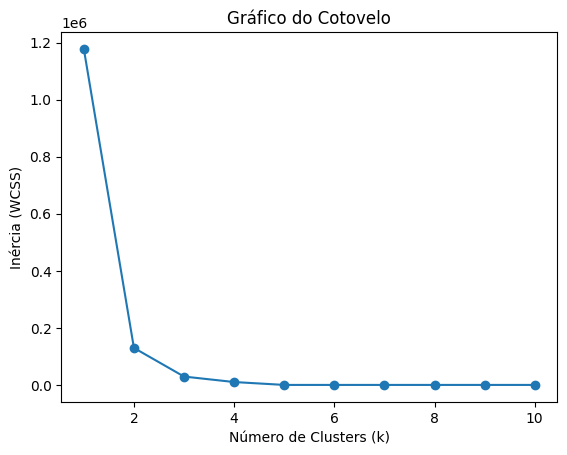

In [ ]:
# Plotar o gráfico do cotovelo
plt.plot(range(1, 11), inercia, marker='o')
plt.title('Gráfico do Cotovelo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia (WCSS)')
plt.show()

In [ ]:
#Aplicar o algoritmo K-meas e incluir um coluna com o cluster correspondente no dataframe
kmeans = KMeans(n_clusters=3, random_state=42) # Define o número de clusters e a semente aleatória
kmeans.fit(X_scaled) # Treina o modelo
df['cluster_kmeans'] = kmeans.labels_ # Adiciona os clusters ao DataFrame
df.head()

,Região,UF,Cidade,Sexo,Faixa Etária,Data Finalização,Tempo Resposta,Nome Fantasia,Segmento de Mercado,Área,Assunto,Grupo Problema,Problema,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor,cluster_kmeans
73,S,SC,Ibirama,M,entre 31 a 40 anos,2023-02-01,10.0,Americanas.com,Comércio Eletrônico,Produtos de Telefonia e Informática,Aparelho celular,Contrato / Oferta,Oferta não cumprida / serviço não fornecido/ v...,Internet,N,S,Finalizada avaliada,Não Resolvida,1.0,0
76,SE,SP,Mogi das Cruzes,M,entre 41 a 50 anos,2023-02-01,8.0,Facebook / Instagram,Provedores de Conteúdo e Outros Serviços na In...,Demais Serviços,"Serviços na internet (provedor, hospedagem, ap...",Atendimento / SAC,Dificuldade de contato / demora no atendimento,Internet,S,S,Finalizada avaliada,Não Resolvida,1.0,0
90,S,SC,Mafra,M,entre 51 a 60 anos,2023-02-03,NaN,Amazon.com.br,Comércio Eletrônico,Produtos Eletrodomésticos e Eletrônicos,"Eletroportáteis ( batedeira, liquidificador, u...",Contrato / Oferta,Oferta não cumprida / serviço não fornecido/ v...,Internet,S,N,Finalizada avaliada,Não Resolvida,1.0,0
96,SE,SP,Campinas,M,entre 31 a 40 anos,2023-02-01,10.0,Banco Bradesco,"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Atendimento Bancário,Cobrança / Contestação,Cobrança indevida / abusiva para alterar ou ca...,Internet,S,S,Finalizada avaliada,Não Resolvida,1.0,0
103,NE,PI,Santa Cruz do Piauí,M,entre 31 a 40 anos,2023-02-01,9.0,SKY,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,TV por Assinatura,Vício de Qualidade,Suspensão ou desligamento indevido do serviço,Telefone,S,S,Finalizada avaliada,Não Resolvida,5.0,1


In [ ]:
# Agrupar por cluster e calcular a média da nota do consumidor
cluster_means = df.groupby('cluster_kmeans')['Nota do Consumidor'].mean()
print(cluster_means)

cluster_kmeans
0    1.088312
1    5.000000
2    3.524115
Name: Nota do Consumidor, dtype: float64


In [ ]:
# Variáveis numéricas
numerical_vars = ['Nota do Consumidor', 'Tempo Resposta']  # Substitua 'Idade_Faixa' pela sua coluna de idade, se houver

# Calcular a média para cada variável numérica em cada cluster
cluster_means = df.groupby('cluster_kmeans')[numerical_vars].mean()
print(cluster_means)

                Nota do Consumidor  Tempo Resposta
cluster_kmeans                                    
0                         1.088312        6.236416
1                         5.000000        5.995768
2                         3.524115        6.400549


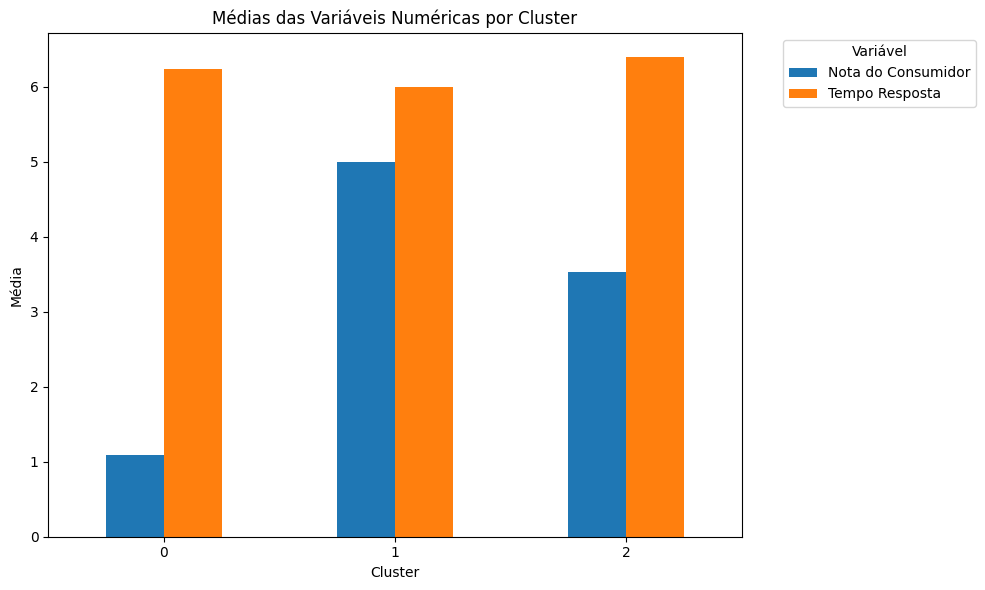

In [ ]:
import matplotlib.pyplot as plt

# ... (código para calcular as médias) ...

# Criar um gráfico de barras para as médias
cluster_means.plot(kind='bar', figsize=(10, 6))
plt.title('Médias das Variáveis Numéricas por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Média')
plt.xticks(rotation=0)
plt.legend(title='Variável', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Exemplo de interpretação**:

Suponha que você tenha os seguintes resultados:  

Cluster 0: Média da nota do consumidor = 1.5  
Cluster 1: Média da nota do consumidor = 3.2  
Cluster 2: Média da nota do consumidor = 4.8  
Com base nesses resultados, você poderia interpretar os clusters da seguinte forma:  

Cluster 0: Consumidores insatisfeitos (notas baixas).  
Cluster 1: Consumidores neutros (notas médias).  
Cluster 2: Consumidores satisfeitos (notas altas).

**Atenção:**  
Lembre-se que a interpretação dos clusters depende do contexto do seu problema e das variáveis que você utilizou no K-means. É importante realizar uma análise exploratória dos dados para compreender as características de cada cluster e atribuir um significado a eles.  

In [ ]:
# Variáveis categóricas
categorical_vars = ['Segmento de Mercado', 'Grupo Problema', 'UF', 'Sexo']  # Substitua pelas suas colunas categóricas

# Calcular a frequência para cada variável categórica em cada cluster
for var in categorical_vars:
    cluster_freq = df.groupby('cluster_kmeans')[var].value_counts(normalize=True)  # normalize=True para obter porcentagens
    print(f"\nFrequência de '{var}' em cada cluster:\n{cluster_freq}")


Frequência de 'Segmento de Mercado' em cada cluster:
cluster_kmeans  Segmento de Mercado                                                    
0               Bancos, Financeiras e Administradoras de Cartão                            0.264288
                Viagens, Turismo e Hospedagem                                              0.119499
                Operadoras de Telecomunicações (Telefonia, Internet, TV por assinatura)    0.078664
                Comércio Eletrônico                                                        0.077940
                Transporte Aéreo                                                           0.049468
                                                                                             ...   
2               Entidades Sem Fins Lucrativos                                              0.000625
                Fabricantes - Móveis, Colchões e Acessórios                                0.000310
                Fabricantes - Produtos Químicos e Farmacêu

# **Interpretando os resultados:**

Após calcular as médias e frequências e visualizar os resultados, você pode começar a interpretar as características de cada cluster. Compare as médias e frequências entre os clusters para identificar padrões e diferenças significativas. Use seu conhecimento sobre o problema e as variáveis para atribuir um significado a cada cluster.

Lembre-se de que essa análise é apenas um ponto de partida. Explore outras métricas e realize análises mais detalhadas para obter uma compreensão mais completa dos seus dados e dos clusters gerados pelo K-means.

# **Árvore de Decisão**

A Árvore de Decisão é um dos algoritmos mais simples e intuitivos de Machine Learning supervisionado, usado tanto para classificação quanto para regressão.

- Como funciona?
Imita a tomada de decisão humana, criando um modelo em forma de árvore.

Cada nó interno representa uma pergunta ou teste lógico sobre uma variável.

Cada ramo representa um resultado possível da pergunta.

Cada folha representa uma classe (classificação) ou um valor (regressão) final.

- Exemplo simplificado:
Suponha que queremos prever se uma pessoa vai comprar um ingresso de cinema com base no clima e disponibilidade de tempo:

         Está chovendo?
           /       \
         Sim       Não
        /            \
    Vai ao cinema?   Tem tempo?
                        /   \
                     Sim    Não
                   Compra   Não compra
- Vantagens:
Fácil de entender e visualizar.

Requer pouco preparo dos dados.

Funciona com dados numéricos e categóricos.

- Desvantagens:
Pode superajustar (overfitting) se for muito profunda.

Sensível a pequenas variações nos dados.

- Conceitos importantes:
Ganho de informação ou índice Gini: usados para decidir qual variável "dividir".

Poda (pruning): técnica para evitar que a árvore cresça demais e perca capacidade de generalização.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Configurar opções do pandas para melhor visualização
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)

In [ ]:
# Carregar os dados (substitua pelo seu caminho)
df = pd.read_csv("/content/drive/MyDrive/PI/dados_consolidados2.csv", sep=',', encoding="utf-8")
df.head(10)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2261907 entries, 0 to 2261906
Data columns (total 19 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Região                  object 
 1   UF                      object 
 2   Cidade                  object 
 3   Sexo                    object 
 4   Faixa Etária            object 
 5   Data Finalização        object 
 6   Tempo Resposta          float64
 7   Nome Fantasia           object 
 8   Segmento de Mercado     object 
 9   Área                    object 
 10  Assunto                 object 
 11  Grupo Problema          object 
 12  Problema                object 
 13  Como Comprou Contratou  object 
 14  Procurou Empresa        object 
 15  Respondida              object 
 16  Situação                object 
 17  Avaliação Reclamação    object 
 18  Nota do Consumidor      float64
dtypes: float64(2), object(17)
memory usage: 327.9+ MB


In [ ]:
df.describe()

,Tempo Resposta,Nota do Consumidor,idade_min,idade_max,Idade_Faixa
count,1.161295e+06,1.177929e+06,1145487.0,1145487.0,1145487.0
mean,6.180699e+00,2.836160e+00,34.539962,43.539962,39.039962
std,3.293920e+00,1.806203e+00,10.910652,10.910652,10.910652
min,0.000000e+00,1.000000e+00,21.0,30.0,25.5
25%,3.000000e+00,1.000000e+00,31.0,40.0,35.5
50%,7.000000e+00,3.000000e+00,31.0,40.0,35.5
75%,9.000000e+00,5.000000e+00,41.0,50.0,45.5
max,8.000000e+01,5.000000e+00,61.0,70.0,65.5


In [ ]:
df.head(100)

,Região,UF,Cidade,Sexo,Faixa Etária,Data Finalização,Tempo Resposta,Nome Fantasia,Segmento de Mercado,Área,Assunto,Grupo Problema,Problema,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor
0,SE,SP,São Paulo,M,entre 41 a 50 anos,2023-02-01,10.0,Serasa Experian,Bancos de Dados e Cadastros de Consumidores,Serviços Financeiros,Score / Pontuação de Crédito,Dados Pessoais e Privacidade,Dados pessoais ou financeiros incorretos / des...,Não comprei / contratei,S,S,Finalizada não avaliada,Não Avaliada,NaN
1,S,RS,Caxias do Sul,F,entre 31 a 40 anos,2023-02-01,10.0,Banco Pan,"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Cartão de Crédito / Cartão de Débito / Cartão ...,Cobrança / Contestação,Cobrança em duplicidade / Cobrança referente a...,Internet,S,S,Finalizada não avaliada,Não Avaliada,NaN
2,S,SC,Joinville,F,entre 41 a 50 anos,2023-02-02,10.0,Banco Pan,"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Cartão de Crédito / Cartão de Débito / Cartão ...,Cobrança / Contestação,Renegociação / parcelamento de dívida,Telefone,S,S,Finalizada não avaliada,Não Avaliada,NaN
3,S,RS,Novo Hamburgo,F,entre 31 a 40 anos,2023-02-01,10.0,Natura,"Perfumaria, Cosméticos e Higiene Pessoal",Demais Produtos,"Perfumaria, cosméticos e higiene pessoal",Saúde e Segurança,"Alteração de odor, sabor, aspecto ou composiçã...",Internet,N,S,Finalizada não avaliada,Não Avaliada,NaN
4,NE,PI,Teresina,F,entre 41 a 50 anos,2023-02-01,10.0,iFood,Empresas de Intermediação de Serviços / Negócios,Demais Serviços,Serviços de entrega / delivery,Contrato / Oferta,Oferta não cumprida / serviço não fornecido/ v...,Catálogo,S,S,Finalizada não avaliada,Não Avaliada,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,S,PR,Curitiba,F,entre 41 a 50 anos,2023-02-02,10.0,Banco Pan,"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Cartão de Crédito / Cartão de Débito / Cartão ...,Cobrança / Contestação,Negativação indevida (não cumprimento de acord...,Não comprei / contratei,S,S,Finalizada não avaliada,Não Avaliada,NaN
96,SE,SP,Campinas,M,entre 31 a 40 anos,2023-02-01,10.0,Banco Bradesco,"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Atendimento Bancário,Cobrança / Contestação,Cobrança indevida / abusiva para alterar ou ca...,Internet,S,S,Finalizada avaliada,Não Resolvida,1.0
97,S,SC,Brusque,M,entre 61 a 70 anos,2023-02-03,8.0,Banco Agibank (Agiplan),"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Conta corrente / Salário / Poupança /Conta Apo...,Atendimento / SAC,SAC - Demanda não resolvida / não respondida /...,Não comprei / contratei,S,S,Finalizada não avaliada,Não Avaliada,NaN
98,NE,AL,Maceió,M,entre 31 a 40 anos,2023-02-01,7.0,Latam Airlines (Tam),Transporte Aéreo,Transportes,Aéreo,Informação,Informações incompletas / inadequadas sobre o ...,Telefone,S,S,Finalizada não avaliada,Não Avaliada,NaN


In [ ]:
# Precisamos que a variável categórica (Faixa Etária) esteja convertida para numérica
# (Este é um exemplo básico, você poderá utilizar outras colunas se desejar)

In [ ]:
# Contar NaN na coluna "Nota do Consumidor"
num_nan = df['Nota do Consumidor'].isna().sum()
print(f"Número de valores NaN na coluna 'Nota do Consumidor': {num_nan}")

Número de valores NaN na coluna 'Nota do Consumidor': 1083978


In [ ]:
# Remove as linhas com valores NaN na coluna 'Nota do Consumidor'
df = df.dropna(subset=['Nota do Consumidor'])

In [ ]:
# Supondo que sua coluna se chama 'Faixa Etária'
df['Faixa Etária'] = df['Faixa Etária'].str.strip()

# Extrai os dois números do intervalo com expressão regular
df[['idade_min', 'idade_max']] = df['Faixa Etária'].str.extract(r'entre (\d+) a (\d+)').astype('Int64')

# Cria uma nova coluna com a média do intervalo
df['Idade_Faixa'] = df[['idade_min', 'idade_max']].mean(axis=1)

In [ ]:
df.head()

,Região,UF,Cidade,Sexo,Faixa Etária,Data Finalização,Tempo Resposta,Nome Fantasia,Segmento de Mercado,Área,Assunto,Grupo Problema,Problema,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor,idade_min,idade_max,Idade_Faixa
73,S,SC,Ibirama,M,entre 31 a 40 anos,2023-02-01,10.0,Americanas.com,Comércio Eletrônico,Produtos de Telefonia e Informática,Aparelho celular,Contrato / Oferta,Oferta não cumprida / serviço não fornecido/ v...,Internet,N,S,Finalizada avaliada,Não Resolvida,1.0,31,40,35.5
76,SE,SP,Mogi das Cruzes,M,entre 41 a 50 anos,2023-02-01,8.0,Facebook / Instagram,Provedores de Conteúdo e Outros Serviços na In...,Demais Serviços,"Serviços na internet (provedor, hospedagem, ap...",Atendimento / SAC,Dificuldade de contato / demora no atendimento,Internet,S,S,Finalizada avaliada,Não Resolvida,1.0,41,50,45.5
90,S,SC,Mafra,M,entre 51 a 60 anos,2023-02-03,NaN,Amazon.com.br,Comércio Eletrônico,Produtos Eletrodomésticos e Eletrônicos,"Eletroportáteis ( batedeira, liquidificador, u...",Contrato / Oferta,Oferta não cumprida / serviço não fornecido/ v...,Internet,S,N,Finalizada avaliada,Não Resolvida,1.0,51,60,55.5
96,SE,SP,Campinas,M,entre 31 a 40 anos,2023-02-01,10.0,Banco Bradesco,"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Atendimento Bancário,Cobrança / Contestação,Cobrança indevida / abusiva para alterar ou ca...,Internet,S,S,Finalizada avaliada,Não Resolvida,1.0,31,40,35.5
103,NE,PI,Santa Cruz do Piauí,M,entre 31 a 40 anos,2023-02-01,9.0,SKY,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,TV por Assinatura,Vício de Qualidade,Suspensão ou desligamento indevido do serviço,Telefone,S,S,Finalizada avaliada,Não Resolvida,5.0,31,40,35.5


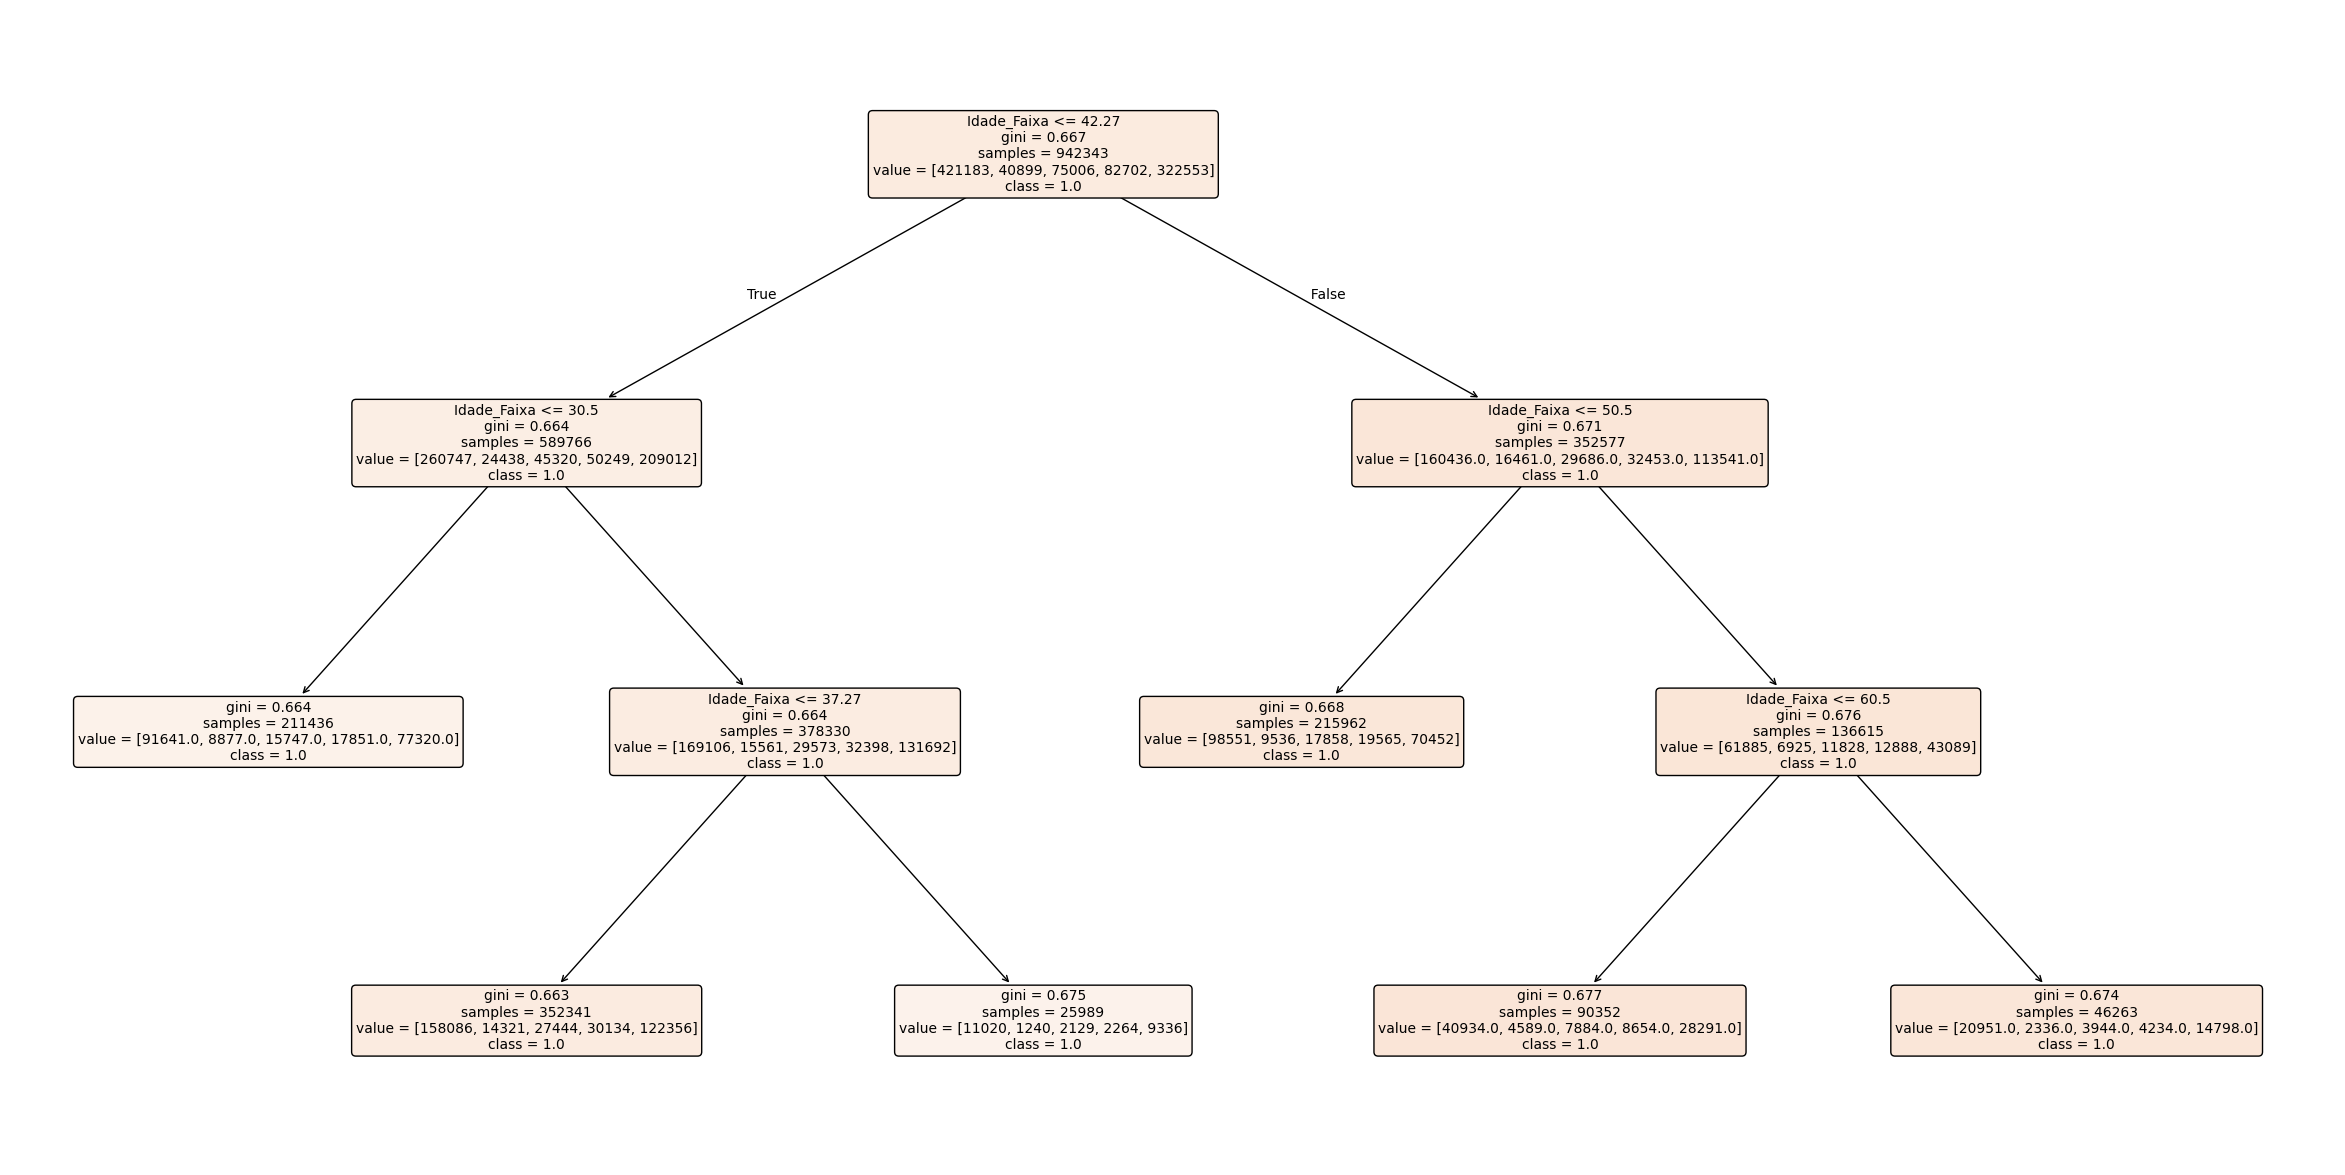

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

# Assumindo que seu DataFrame se chama df e já está carregado
# Suas features (X) e target (y)
X = df[['Idade_Faixa']] # Exemplo com duas features numéricas
y = df['Nota do Consumidor']

# Tratar dados ausentes (exemplo simples: preencher com a média)
X = X.fillna(X.mean())

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo de Árvore de Decisão (para 5 classes)
modelo_arvore = DecisionTreeClassifier(max_depth=10, random_state=42)
modelo_arvore.fit(X_train, y_train)

# Obter os nomes das classes (as notas) na ordem que o modelo as identificou
class_names = [str(c) for c in modelo_arvore.classes_]

# Ajustar o tamanho da figura e visualizar a árvore
plt.figure(figsize=(30, 15)) # Ajuste o tamanho conforme necessário

plot_tree(modelo_arvore,
          feature_names=X.columns.tolist(),
          class_names=class_names, # Passar os nomes das classes
          filled=True,
          rounded=True,
          fontsize=10) # Ajuste o tamanho da fonte

plt.show()

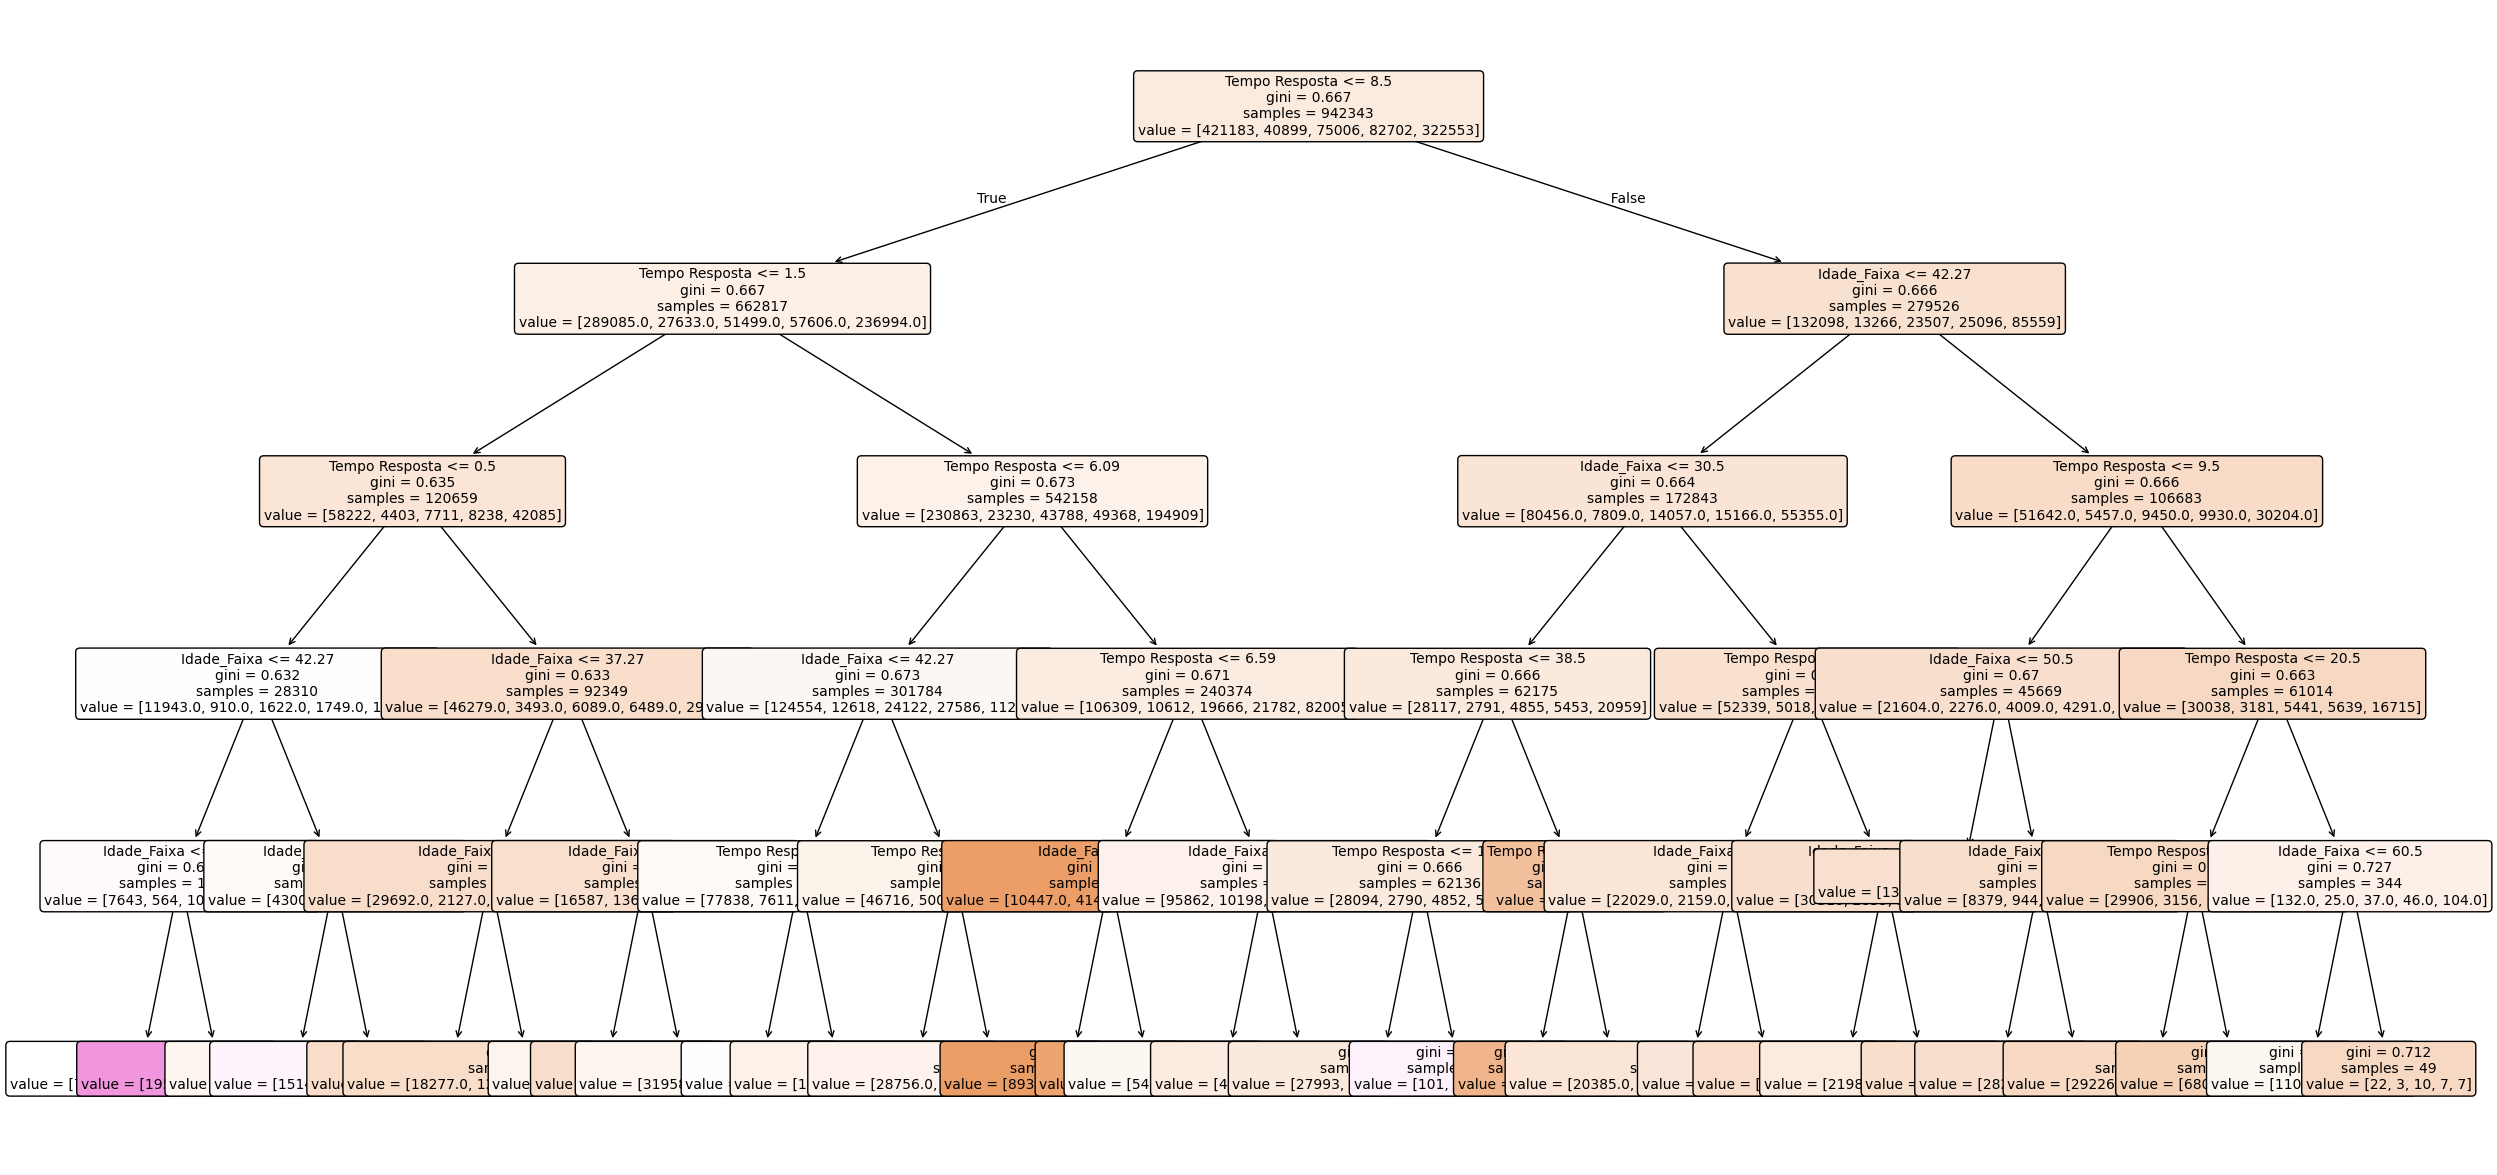

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# ... (seu código de treinamento do modelo)

# Ajuste o tamanho da figura para ser maior
plt.figure(figsize=(30, 15)) # Exemplo: aumente esses valores conforme necessário

plot_tree(modelo_arvore,
          feature_names=X.columns.tolist(),
          filled=True,
          rounded=True,
          fontsize=10) # Ajuste o tamanho da fonte se necessário

plt.show()

A interpretação da árvore de decisão gerada é fundamental para entender como o modelo está tomando suas decisões de previsão.

Cada nó (retângulo) na árvore de decisão representa uma decisão ou um resultado. As informações dentro de cada nó geralmente incluem:

A condição de divisão (splitting condition): Esta é a regra que o modelo usa para decidir para qual nó filho um dado deve ir. Ela é geralmente formatada como feature_name <= value.

Exemplo: Tempo Resposta <= 10.5. Isso significa que se o valor da feature "Tempo Resposta" para um determinado dado for menor ou igual a 10.5, ele seguirá para o nó filho da esquerda. Caso contrário, seguirá para o nó filho da direita.

gini (ou entropy): Este é o "critério" usado para avaliar a qualidade da divisão. O gini (ou Gini impurity) mede a impureza do nó. Um valor de gini próximo de 0 indica um nó mais puro, onde a maioria dos dados pertence a uma única classe (no caso de classificação). Em árvores de regressão, você verá outro critério, como o Erro Quadrático Médio (MSE).

Interpretação: O modelo busca divisões que minimizem o gini nos nós filhos, ou seja, que criem grupos de dados mais homogêneos em relação à variável que está sendo prevista ('Nota do Consumidor').
samples: O número de amostras (ou linhas de dados) que chegam a este nó.

Interpretação: Este número mostra quantas observações do conjunto de dados de treinamento (ou teste, dependendo de como você está visualizando a árvore) satisfazem as condições de todos os nós pais até chegar a este nó.

value: Em árvores de classificação (como a nossa), este é o número de amostras em cada classe dentro deste nó. No nosso caso, como 'Nota do Consumidor' é numérica, se estivéssemos construindo uma árvore de regressão, o value representaria a média da 'Nota do Consumidor' para as amostras neste nó. Como estamos tratando a 'Nota do Consumidor' como categorias (notas de 1 a 5), o value é a contagem de amostras para cada categoria de nota.

Exemplo (Classificação): value = [10, 50, 5, 20, 15] indicaria que neste nó há 10 amostras com Nota 1, 50 com Nota 2, 5 com Nota 3, etc.
class: Em árvores de classificação, esta é a classe majoritária neste nó. É a classe que o modelo prediria para uma nova amostra que chegasse a este nó terminal (folha).

Nós Terminais (Folhas):

Os nós no final da árvore (que não têm nós filhos) são chamados de nós terminais ou folhas. Eles representam o resultado da previsão para as amostras que chegam a este nó. Em um nó terminal de classificação, o class indica a classe prevista para as amostras nesse nó.

Como "Seguir" uma Amostra na Árvore:

Para entender como uma árvore de decisão faz uma previsão para uma nova amostra, você começa no nó raiz (o nó superior) e segue as condições de divisão:

Comece no nó raiz.
Verifique a condição de divisão neste nó.
Se a condição for verdadeira, siga para o nó filho da esquerda.
Se a condição for falsa, siga para o nó filho da direita.
Repita os passos 2 a 4 até chegar a um nó terminal.
O class (ou o value médio, no caso de regressão) do nó terminal é a previsão para aquela amostra.
Interpretação da Lógica de Decisão:

Ao olhar para a árvore, você pode ver quais features são mais importantes no processo de decisão (geralmente as que aparecem mais perto da raiz) e quais valores dessas features levam a diferentes previsões de 'Nota do Consumidor'.

Por exemplo, você pode observar que um "Tempo Resposta" baixo (<= X) pode levar a um caminho na árvore que geralmente resulta em notas do consumidor mais altas, enquanto um tempo de resposta alto (> X) pode levar a um caminho que resulta em notas mais baixas.

Dicas para Interpretação:

Mantenha a árvore simples: Para facilitar a interpretação inicial, comece com uma árvore de profundidade limitada (max_depth no DecisionTreeClassifier). Árvores muito profundas podem ser difíceis de visualizar e entender.
Analise os nós principais: Concentre-se nos nós próximos à raiz para entender as divisões mais importantes.
Observe os nós terminais: Veja as classes (ou valores) nos nós finais e tente entender por que as amostras chegam a esses nós com base nas condições de divisão ao longo do caminho.
Lembre-se que a interpretação da árvore de decisão lhe dá insights sobre as relações dentro dos seus dados e como o modelo está utilizando as features para tomar decisões. Isso pode ser muito valioso para entender os fatores que influenciam a 'Nota do Consumidor'.

Observação:

O número de folhas na árvore de decisão é determinado pela complexidade do modelo (controlada pelos parâmetros) e pela forma como as features interagem para prever a variável alvo, e não diretamente pelo número de valores possíveis da variável alvo.

Em árvores utilizando o algoritmo DecisionTreeClassifier (para classificação), cada folha predizirá uma das 5 categorias possíveis (1 a 5), mas o número total de folhas pode ser mais ou menos que 5. Se você estiver usando o DecisionTreeRegressor (para regressão), cada folha predizirá a média das notas das amostras nesse nó, e o número de folhas também não será necessariamente 5.